# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Shafira Nurrusyifa
- **Email:** shafiranurrusyifa@gmail.com
- **ID Dicoding:** shafiraenn


## Menentukan Pertanyaan Bisnis

Pada tahun 2013, penurunan kualitas udara di Beijing pernah mencapai 'Red Alert'- sebuah kondisi polusi serius dalam 3 hari berturut-turut, yang akhirnya memicu pemerintah untuk mengambil 'Heavy Air Pollution Contingency Plan'.

Mengetahui penurunan kualitas udara di Beijing, pemerintah mengumumkan '5-year-action-plan' yang bertujuan untuk mengatasi masalah polusi udara untuk melindungi kesehatan masyarakat sekaligus mendorong pertumbuhan jangka panjang yang berkelanjutan.

Proyek analisis data kali ini, akan **mengevaluasi keberhasilan '5-year-action-plan' pemerintah Munisipalitas Beijing**, serta **keperluan peringatan dini berdasarkan kondisi cuaca tertentu**, sehingga langkah-langkah seperti pembatasan aktivitas industri atau transportasi pada kondisi cuaca tertentu dapat diterapkan lebih awal untuk mencegah lonjakan konsentrasi polutan.

- Keberhasilan '5-year-action-plan' ini akan dinilai dari **konsentrasi rata rata rata polutan dari tahun ke tahun**
- Akan dilakukan **analisis korelasi antara konsentrasi polutan serta faktor meteorologi** untuk menentukan perlunya sistem peringatan dini
  

## Import Semua Packages/Library yang Digunakan

Pada tahapan ini, dilakukan import packages dan atau library yg akan digunakan pada analisis data air quality


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install streamlit -q
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

Pada tahap ini, data yang dibutuhkan untuk menjawab pertanyaan analisis dikumpulkan, yaitu satu dataset untuk setiap divisi administratif Kota Beijing. Dataset diakses melalui URL raw dari masing-masing file CSV yang merepresentasikan setiap stasiun pemantauan.

★ Layout Kota Beijing membagi kota tersebut menjadi 4 area administratif yaitu
*   Pusat kota
*   Perkotaan di sekitarnya
*   Pinggiran kota
*   Utara jauh





In [21]:
# Stasiun representatif pusat kota
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
# Stasiun representatif perkotaan sekitar
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
# Stasiun representatif pinggiran kota
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
# Stasiun representatif utara jauh
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")

In [22]:
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [23]:
dataframes = [tiantan_df, wanliu_df, changping_df, huairou_df]

In [24]:
#Menambah atribut name pada masing masing dataframes
for dataframe, area in zip(dataframes, ['Tiantan', 'Wanliu', 'Changping', 'Huairou']):
  dataframe.name = area

**Insight:**
- Dataset ini berisi informasi mengenai polutan udara setiap jam mulai dari 1 Maret 2013 hingga 28 Februari 2017.
- Fitur yg terdapat dalam dataset ini antara lain: Waktu perekaman (tahun, bulan, tanggal, dan jam), konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3), dan variabel meteorologi (temperatur, tekanan udara, titik embun, presipitasi, arah angin, kecepatan angin) dan stasiun perekaman



### Assessing Data

Assessing data dari Stasiun Perekaman Tiantan

In [25]:
tiantan_df.info()
tiantan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [26]:
print(tiantan_df.duplicated().sum())

0


Assessing data dari Stasiun Perekaman Wanliu

In [27]:
wanliu_df.info()
wanliu_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [28]:
print(wanliu_df.duplicated().sum())

0


Assesing data dari Stasiun Perekaman Changping

In [29]:
changping_df.info()
changping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [30]:
print(changping_df.duplicated().sum())

0


Assessing data dari Stasiun Perekaman Huairou

In [31]:
huairou_df.info()
huairou_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [32]:
print(huairou_df.duplicated().sum())

0


**Insight:**
- Format variabel waktu masih berupa integer, perlu diubah menjadi datetime untuk mempermudah analisis dan manipulasi berbasis waktu
- Ada beberapa missing value dari kolom PM2.5, PM10, SO2, NO2, CO, O3, Temp, Pres, DewP, Rain, WD, dan WSPM
- Tidak ada duplikat pada dataset ini

### Cleaning Data

- Melakukan feature engineering untuk date(yyyy-mm-dd) untuk analisis lanjutan
- Untuk missing value dengan data numerik seperti PM2.5, PM10, SO2, NO2, CO, O3, Temp, Pres, DewP, Rain, dan WSPM akan diisi dengan rerata nilai perbulan kolom tersebut (untuk menangkap pola musimannya)
- Untuk missing value dengan data kategorik seperti wd akan diisi dengan nilai yang paling sering muncul


Konversi day, month, year menjadi datetime (yyyy-mm-dd)

In [33]:
for dataframe in dataframes:
  dataframe['date(yyyy-mm-dd)'] = pd.to_datetime(
    dataframe['year'].astype(str) + '-' +
    dataframe['month'].astype(str).str.zfill(2) + '-' +
    dataframe['day'].astype(str).str.zfill(2) + ' ' +
    dataframe['hour'].astype(str).str.zfill(2) + ':00:00')

In [34]:
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date(yyyy-mm-dd)
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


In [35]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   No                35064 non-null  int64         
 1   year              35064 non-null  int64         
 2   month             35064 non-null  int64         
 3   day               35064 non-null  int64         
 4   hour              35064 non-null  int64         
 5   PM2.5             34387 non-null  float64       
 6   PM10              34467 non-null  float64       
 7   SO2               33946 non-null  float64       
 8   NO2               34320 non-null  float64       
 9   CO                33938 non-null  float64       
 10  O3                34221 non-null  float64       
 11  TEMP              35044 non-null  float64       
 12  PRES              35044 non-null  float64       
 13  DEWP              35044 non-null  float64       
 14  RAIN              3504

Mengisi NA(s)

In [36]:
#Mengisi NAs untuk kolom dengan nilai numerik dengan rerata tiap bulan (dan tahunnya)
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for dataframe in dataframes:
  for column in numerical_columns:
    dataframe[column] = dataframe[column].fillna(
        dataframe.groupby(
            [dataframe['date(yyyy-mm-dd)'].dt.year, dataframe['date(yyyy-mm-dd)'].dt.month]
            )[column].transform('mean'))

In [37]:
#Checking if all NAs are filled
for dataframe in dataframes:
  print(dataframe.isna().sum())

No                   0
year                 0
month                0
day                  0
hour                 0
PM2.5                0
PM10                 0
SO2                  0
NO2                  0
CO                   0
O3                   0
TEMP                 0
PRES                 0
DEWP                 0
RAIN                 0
wd                  78
WSPM                 0
station              0
date(yyyy-mm-dd)     0
dtype: int64
No                    0
year                  0
month                 0
day                   0
hour                  0
PM2.5                 0
PM10                  0
SO2                   0
NO2                   0
CO                    0
O3                    0
TEMP                  0
PRES                  0
DEWP                  0
RAIN                  0
wd                  123
WSPM                  0
station               0
date(yyyy-mm-dd)      0
dtype: int64
No                    0
year                  0
month                 0
day      

In [38]:
#Mengisi NAs untuk data kategorik dengan nilai yang paling sering muncul
for dataframe in dataframes:
  for column in ['wd']:
    dataframe[column] = dataframe[column].fillna(dataframe[column].mode()[0])

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore: Tren tahunan rata rata konsentrasi polutan

In [48]:
#Tiantan
tiantan_yearly_df = tiantan_df.resample('YE', on='date(yyyy-mm-dd)')['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2'].mean()
tiantan_yearly_df.index = tiantan_yearly_df.index.strftime('%Y')
tiantan_yearly_df = tiantan_yearly_df.reset_index()
tiantan_yearly_df.rename(columns={'date(yyyy-mm-dd)': 'year'}, inplace=True)
tiantan_yearly_df.head()

,year,CO,SO2,O3,PM2.5,PM10,NO2
0,2013,1326.373273,18.201028,54.494279,83.208784,108.269392,53.292900
1,2014,1329.169213,19.818678,56.420779,86.439378,114.584667,55.967988
2,2015,1300.245146,11.806769,60.322280,82.482113,102.924320,51.921758
3,2016,1196.824552,8.927855,55.451564,73.823573,97.053775,50.023299
4,2017,1722.075418,14.014848,35.814377,98.074707,125.074423,63.912344


In [49]:
#Wanliu
wanliu_yearly_df = wanliu_df.resample('YE', on='date(yyyy-mm-dd)')['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2'].mean()
wanliu_yearly_df.index = wanliu_yearly_df.index.strftime('%Y')
wanliu_yearly_df = wanliu_yearly_df.reset_index()
wanliu_yearly_df.rename(columns={'date(yyyy-mm-dd)': 'year'}, inplace=True)
wanliu_yearly_df.head()

,year,CO,SO2,O3,PM2.5,PM10,NO2
0,2013,1348.504108,23.653238,46.581081,91.605831,112.294034,68.555553
1,2014,1371.363889,24.978421,41.060664,89.650009,130.355858,75.492642
2,2015,1329.376883,14.861336,52.055323,80.449137,106.787007,58.456465
3,2016,1231.397074,10.623595,53.740602,71.386022,92.799720,58.490811
4,2017,1748.482413,20.300611,35.800042,94.009215,110.746968,69.016759


In [50]:
#Changping
changping_yearly_df = changping_df.resample('YE', on='date(yyyy-mm-dd)')['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2'].mean()
changping_yearly_df.index = changping_yearly_df.index.strftime('%Y')
changping_yearly_df = changping_yearly_df.reset_index()
changping_yearly_df = changping_yearly_df.rename(columns={'date(yyyy-mm-dd)': 'year'})
changping_yearly_df.head()

,year,CO,SO2,O3,PM2.5,PM10,NO2
0,2013,1042.730046,19.204644,61.481637,72.687770,91.231580,41.086086
1,2014,1200.194181,21.116235,63.164595,79.709128,106.795024,45.651869
2,2015,1160.874114,11.699263,57.858852,69.142755,93.666286,42.746891
3,2016,1123.066189,8.146823,53.937619,61.571151,86.245911,45.546425
4,2017,1527.799111,16.428030,33.135464,79.926395,94.188866,50.980737


In [51]:
#Huairou
huairou_yearly_df = huairou_df.resample('YE', on='date(yyyy-mm-dd)')['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2'].mean()
huairou_yearly_df.index = huairou_yearly_df.index.strftime('%Y')
huairou_yearly_df = huairou_yearly_df.reset_index()
huairou_yearly_df.rename(columns={'date(yyyy-mm-dd)': 'year'}, inplace=True)
huairou_yearly_df.head()

,year,CO,SO2,O3,PM2.5,PM10,NO2
0,2013,1004.774610,17.163952,62.201058,68.848576,95.845393,36.057108
1,2014,1062.096907,17.449017,67.833861,76.917147,99.780716,37.164321
2,2015,1041.849745,8.706640,60.481898,70.681617,89.472054,28.407483
3,2016,932.368435,6.636143,53.368535,60.965428,82.174931,27.491814
4,2017,1316.557553,9.769759,46.674386,74.124875,91.880991,38.929461


In [52]:
#Menambah atribut name pada yearly_df
yearly_df = [tiantan_yearly_df, wanliu_yearly_df, changping_yearly_df, huairou_yearly_df]

for df, area in zip(yearly_df, ['Tiantan', 'Wanliu', 'Changping', 'Huairou']):
  df.name = area

**Insight:**
- Di setiap area administratif, pola konsentrasi polutan hampir sama, terjadi sedikit kenaikan pada tahun 2014, menurun sampai tahun 2016 kemudian terjadi kenaikan di 2017 kecuali pada polutan 03.
- Polutan paling dominan di adalah CO diikuti PM10, PM2.5, 03 dan NO2 (kecuali pada area administratif Wanliu, dengan konsentrasi NO2 lebih tinggi daripada O3), dan terendah pada SO2

### Explore: Korelasi antara parameter meteorologi dan konsentrasi polutan

In [53]:
weather = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
pollutants = ['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2']

for dataframe in dataframes:
  pollutants_data = dataframe[pollutants]
  weather_data = dataframe[weather]

  correlation_matrix = pd.DataFrame(index=pollutants, columns=weather)

  for pollutant in pollutants:
    for weather_feature in weather:
      correlation_matrix.loc[pollutant, weather_feature] = dataframe[pollutant].corr(dataframe[weather_feature])

  print(correlation_matrix)
  print('\n')

           TEMP      PRES      DEWP      RAIN      WSPM
CO    -0.325749  0.161787 -0.045597 -0.014091 -0.320908
SO2   -0.232243  0.165484 -0.228852 -0.039013 -0.039059
O3     0.580511 -0.432669  0.281094  0.019055  0.329513
PM2.5 -0.152632  0.010453  0.109585 -0.015251 -0.288586
PM10  -0.121172 -0.019816  0.056301 -0.028077 -0.178251
NO2   -0.324593   0.18842 -0.085321 -0.047748 -0.407583


           TEMP      PRES      DEWP      RAIN      WSPM
CO    -0.410016  0.238505  -0.16323 -0.021356 -0.250732
SO2   -0.330883  0.230665  -0.28303 -0.038643 -0.036379
O3     0.601938 -0.450991  0.319473  0.023703  0.296063
PM2.5 -0.134517  0.007103  0.100678  -0.01269  -0.24314
PM10  -0.120668 -0.019952  0.054381 -0.029631 -0.168775
NO2   -0.300187  0.133238 -0.061875 -0.058042 -0.365365


           TEMP      PRES      DEWP      RAIN      WSPM
CO    -0.353968  0.219953 -0.107172 -0.012135 -0.275993
SO2   -0.354685  0.266651 -0.324169 -0.038484 -0.102075
O3     0.628675 -0.495241  0.383624  0.02963

**insights:**
*   Korelasi koefisien antara polutan dan faktor meteorologi berkisar antara 0.001 hingga 0.6 yang mengindikasikan korelasi rendah sampai sedang antara kedua variables tersebut.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tahunan konsentrasi polutan di Beijing?

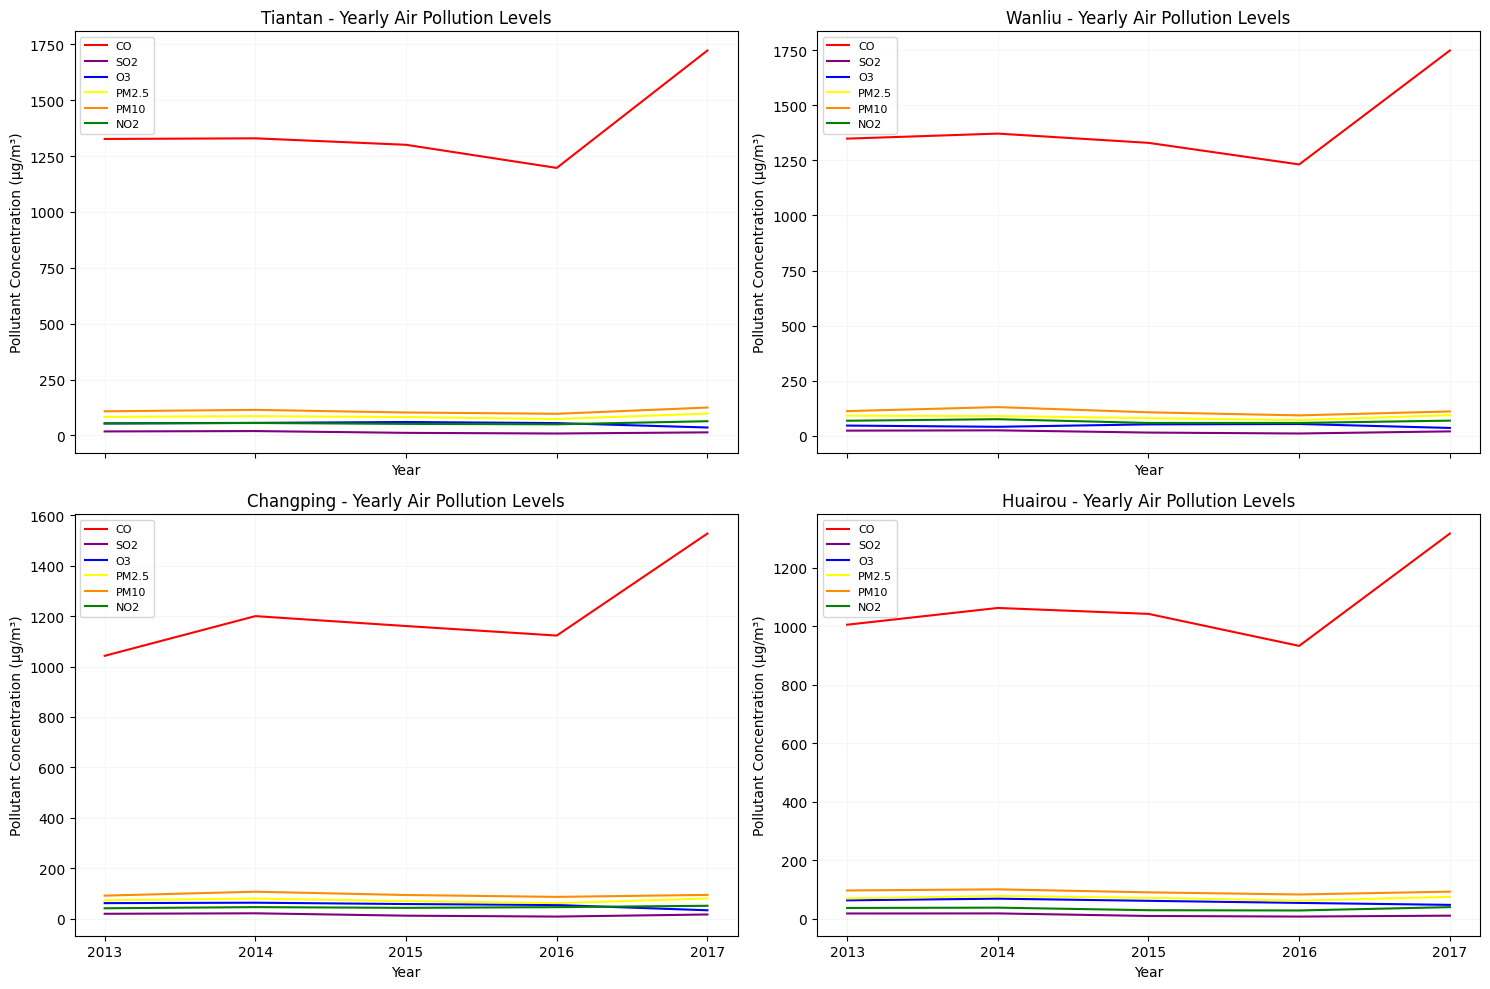

In [54]:
colors = {'CO': 'red', 'SO2': 'purple', 'O3': 'blue', 'PM2.5': 'yellow', 'PM10': 'darkorange', 'NO2': 'green'}

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

for ax, df, station in zip(axes, yearly_df, [ 'Tiantan', 'Wanliu', 'Changping', 'Huairou']):
    for pollutant in pollutants:
        ax.plot(df['year'], df[pollutant], label=pollutant, color=colors[pollutant])

    ax.set_title(f'{station} - Yearly Air Pollution Levels', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Pollutant Concentration (µg/m³)', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.1)

plt.tight_layout()

plt.show()

**Insights:**
- Pada visualisasi ini, lebih mudah melihat fluktuasi konsentrasi polutan, terutama kenaikan drastis yang terjadi pada CO di tahun 2017. Yang mana, data pada tahun 2017 **hanya mencakup periode hingga 28 Februari 2017**. Periode tersebut masuk ke dalam **musim dingin yang (dilansir dari NBC News) merupakan periode paling tercemar oleh polusi udara**, karena pemakaian *heater* (yang juga menjelaskan korelasi beberapa polutan dengan temperatur) dan manufaktur yang menaikan intensitas produksi persiapan tahun baru china.

### Pertanyaan 2: Bagaimana tingkat korelasi antara faktor meteorologi dengan konsentrasi polutan?

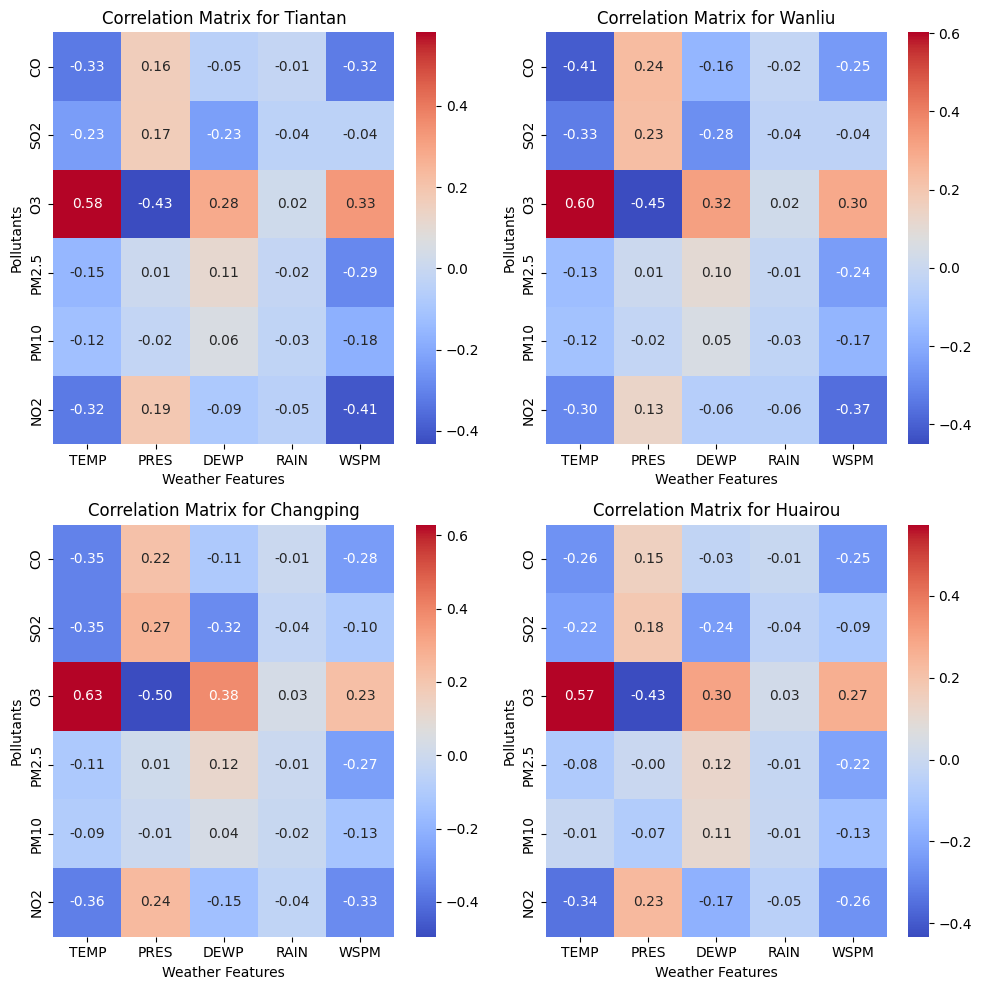

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()


for ax, dataframe, station in zip(axes, dataframes, ['Tiantan', 'Wanliu', 'Changping', 'Huairou']):
  correlation_matrix = pd.DataFrame(index=pollutants, columns=weather)
  for pollutant in pollutants:
    for weather_feature in weather:
      correlation_matrix.loc[pollutant, weather_feature] = dataframe[pollutant].corr(dataframe[weather_feature])

  correlation_matrix = correlation_matrix.astype(float)


  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, ax=ax)
  ax.set_title(f'Correlation Matrix for {station}', fontsize=12)
  ax.set_xlabel('Weather Features', fontsize=10)
  ax.set_ylabel('Pollutants', fontsize=10)

plt.tight_layout()
plt.show()



**Insight:**
- Pada visualisasi ini dapat terlihat jelas bagaimana korelasi masing-masing polutan dengan faktor meteorologi
* CO, SO2 dan O3 menunjukkan korelasi yang lebih kuat dengan temperatur dibandingkan dengan faktor meteorologi lainnya, sedangkan
*   Particulate matter menunjukkan korelasi yang lebih kuat dengan kecepatan angin dibandingkan dengan faktor meteorologi lainnya.


## Pembuatan Dashboard menggunakan streamlit

In [61]:
for yearly in yearly_df:
  yearly.to_csv(f'yearly_{yearly.name}.csv', index=False)

for dataframe in dataframes:
  dataframe.to_csv(f'{dataframe.name}.csv', index=False)

## Conclusion

- Berdasarkan konsentrasi rerata tahunan Munisipaltitas Beijing, dapat dikatakan five-year-plan berhasil menurunkan rerata konsentrasi polutan tiap tahunnya, kenaikan konsentrasi (terutama pada CO) terjadi karena periode yang tercatat pada stasiun perekaman merupakan periode paling tercemar.
- Beberapa polutan dan faktor meteorologi menunjukkan tingkat korelasi yang sedang (>0.5), namun faktor ini dinilai belum cukup untuk memutuskan apakah perlu sistem peringatan dini. Usaha ini dapat dialihkan ke mitigasi langsung (seperti regulasi emisi)